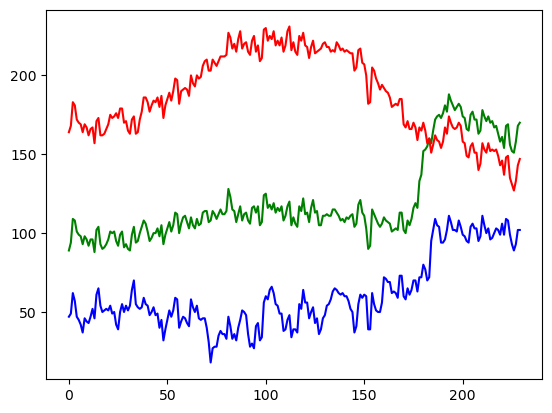

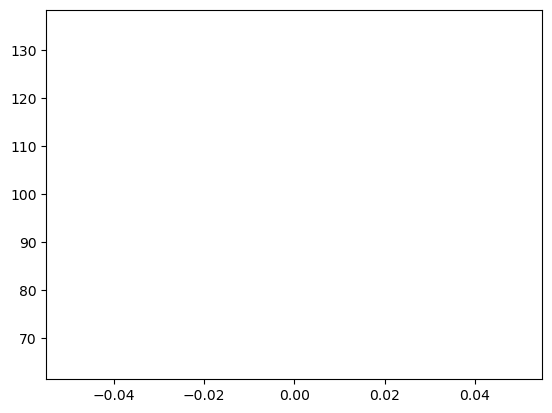

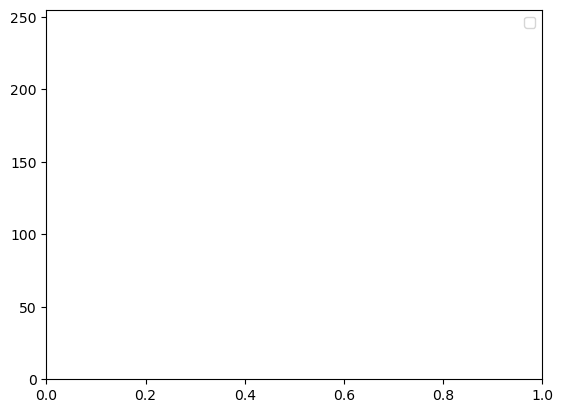

In [6]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
from skimage import draw

# Actual mouse callback function
def print_coords(event, x, y, flags, param):

    # Global variables needed
    global image, image_copy, r_start, c_start

    # If left mouse button is clicked, start of line
    if (event == cv2.EVENT_LBUTTONDOWN):
        r_start = x
        c_start = y

    # If left mouse button is clicked, end of line; plot intensity profile
    if (event == cv2.EVENT_LBUTTONUP):
        r_end = x
        c_end = y
        image = cv2.line(image_copy.copy(), (r_start, c_start), (r_end, c_end), (255, 255, 255), 2)
        line = np.transpose(np.array(draw.line(r_start, c_start, r_end, c_end))) # transpose를 통해, y,x 좌표로 묶임 / skimage.draw.line은 해당 line을 이루는 x좌표 리스트와 y좌표 리스트를 요소로 가지는 list반환.
        data = image_copy.copy()[line[:, 1], line[:, 0], :]
        plt.close()
        plt.figure('Intensity profile')
        plt.plot(data[:, 0], 'b', data[:, 1], 'g', data[:, 2], 'r')
        plt.draw()
        plt.pause(0.001)
        plt.legend(['Blue', 'Green', 'Red'])
        plt.ylim((0, 255))

# Read an image
image = cv2.imread('../images/apple.jpg', cv2.IMREAD_COLOR)
image_copy = image.copy()

# Set up window and mouse callback function
cv2.namedWindow("image")
cv2.setMouseCallback("image", print_coords)

# Loop until the 'c' key is pressed
while True:

    # Display image; wait for keypress
    cv2.imshow("image", image)
    key = cv2.waitKey(1) & 0xFF

    # If 'c' key is pressed, break from loop
    if  key == ord("c") or key == 27:
        break
    if  cv2.getWindowProperty('image', cv2.WND_PROP_VISIBLE) < 1:
        break

cv2.destroyAllWindows()

In [5]:
a = (0,0)
b = (10,5)

np.transpose(np.array(draw.line(*a,*b)))

array([[ 0,  0],
       [ 1,  1],
       [ 2,  1],
       [ 3,  2],
       [ 4,  2],
       [ 5,  3],
       [ 6,  3],
       [ 7,  4],
       [ 8,  4],
       [ 9,  5],
       [10,  5]])